# 12장 판다스를 활용한 데이터 분석
***
## 1. Activity 1
***

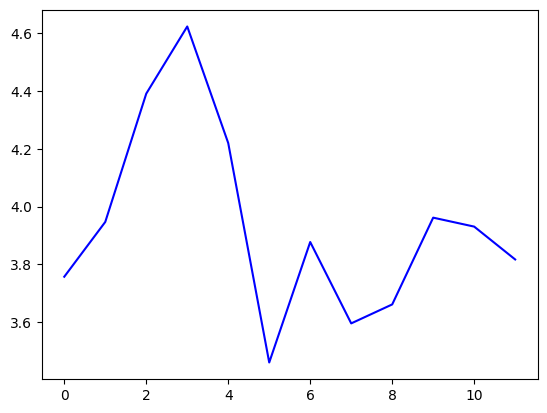

In [6]:
import csv

import matplotlib.pyplot as plt
import pandas as pd

f = open("data\\weather.csv")
data = csv.reader(f)

# 헤더를 제거
header = next(data)

monthly_wind = [0 for x in range(12)]
days_counted = [0 for x in range(12)]

for row in data:
    month = int(row[0][5:7])
    if row[3] != '':
        wind = float(row[3])
        monthly_wind[month-1] += wind
        days_counted[month-1] += 1

for i in range(12):
    monthly_wind[i] /= days_counted[i]

plt.plot(monthly_wind, 'blue')
plt.show()

f.close()

***
## 2. Activity 2
***

            평균기온(°C)  최대 풍속(m/s)  평균 풍속(m/s)
일시                                          
2010-08-01      28.7         8.3         3.4
2010-08-02      25.2         8.7         3.8
2010-08-03      22.1         6.3         2.9
2010-08-04      25.3         6.6         4.2
2010-08-05      27.2         9.1         5.6


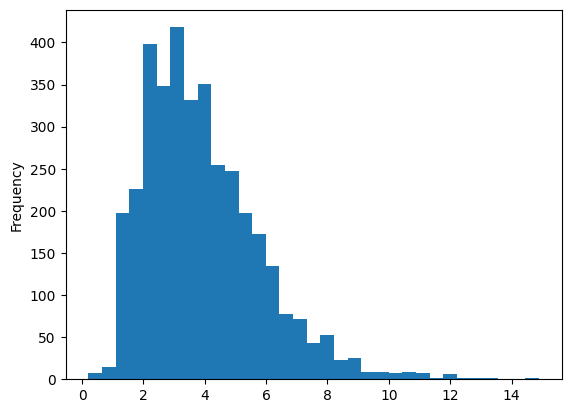

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

#url = "https://raw.githubusercontent.com/HectorSin/ai_basic/master/ai_prog_basic/Chapters/Ch12_Pandas/data/weather.csv"
#weather = pd.read_csv(url, index_col = 0, encoding = 'CP949')
weather = pd.read_csv("data\\weather.csv", index_col = 0, encoding = 'CP949')

print(weather.head())
weather['평균 풍속(m/s)'].plot(kind='hist', bins=33)
plt.show()



In [5]:
print(weather.describe())

print('평균 분석 --------------------------')
print(weather.mean())
print('표준편차 분석 ----------------------')
print(weather.std())

weather.count()



          평균기온(°C)   최대 풍속(m/s)   평균 풍속(m/s)
count  3653.000000  3649.000000  3647.000000
mean     12.942102     7.911099     3.936441
std       8.538507     3.029862     1.888473
min      -9.000000     2.000000     0.200000
25%       5.400000     5.700000     2.500000
50%      13.800000     7.600000     3.600000
75%      20.100000     9.700000     5.000000
max      31.300000    26.000000    14.900000
평균 분석 --------------------------
평균기온(°C)      12.942102
최대 풍속(m/s)     7.911099
평균 풍속(m/s)     3.936441
dtype: float64
표준편차 분석 ----------------------
평균기온(°C)      8.538507
최대 풍속(m/s)    3.029862
평균 풍속(m/s)    1.888473
dtype: float64


평균기온(°C)      3653
최대 풍속(m/s)    3649
평균 풍속(m/s)    3647
dtype: int64

In [4]:
weather['최대 풍속(m/s)'].count()

3649

***
## 3. Activity 3
***

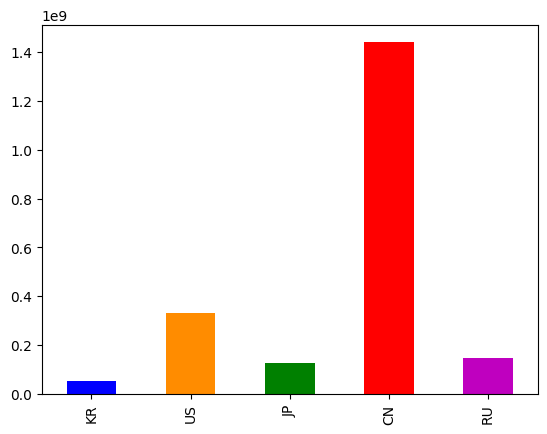

   country      area     capital  population     density
KR   Korea     98480       Seoul    51780579  525.797918
US     USA   9629091  Washington   331002825   34.375293
JP   Japan    377835       Tokyo   125960000  333.373033
CN   China   9596960     Beijing  1439323688  149.977044
RU  Russia  17100000      Moscow   146748600    8.581789


In [7]:
# In[1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "data\\countries.csv"
country = pd.read_csv(url, index_col = 0)

# In[2]:
country['population'].plot(kind='bar', color=('b', 'darkorange', 'g', 'r', 'm'))
plt.show()

# In[3]:
country['density'] = country['population'] / country['area']
print(country)

# In[4]:


## LAB12-2 판다스로 울릉도의 바람 세기 분석하기
***
> 앞서 사용했던 울릉도의 기상 데이터에 기록된 매일의 평균 풍속 데이터를 바탕으로 몇 월의 바람이 가장 강한지 분석해 보았다. 이번에는 이 작업을 판다스를 이용하여 해 보려고 한다. 결과는 앞의 것도 동일하게 나올 것이다.
***

## LAB 12-3 울릉도는 몇 월에 바람이 가장 강할까? groupby() 활용
***
> 울릉도의 기상 데이터에 기록된 매일의 평균 풍속 데이터를 바탕으로 몇 월의 바람이 가장 강한지 분석해 보았다. 이번에는 판다스가 제공하는 groupby() 함수로 더욱 효율적으로 만들어 보라.
***

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

weather = pd.read_csv("data\\weather.csv", encoding='CP949')

weather.head()


,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6


In [9]:
weather['month'] = pd.DatetimeIndex(weather['일시']).month

weather.head()

,일시,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s),month
0,2010-08-01,28.7,8.3,3.4,8
1,2010-08-02,25.2,8.7,3.8,8
2,2010-08-03,22.1,6.3,2.9,8
3,2010-08-04,25.3,6.6,4.2,8
4,2010-08-05,27.2,9.1,5.6,8


C:\Users\kkang\AppData\Local\Temp\ipykernel_11372\1455014416.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = weather.groupby('month').mean()


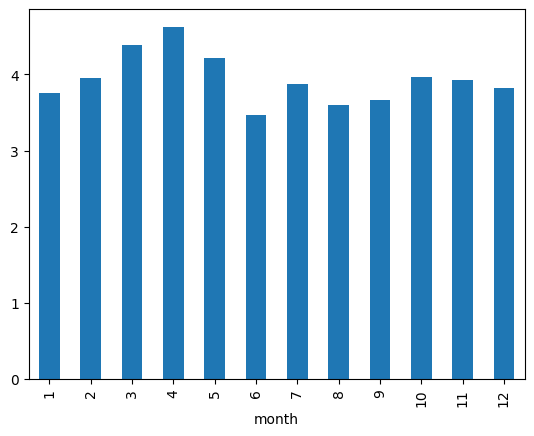

In [11]:
means = weather.groupby('month').mean()
means['평균 풍속(m/s)'].plot(kind = 'bar')

plt.show()

### 12.18 빠진 데이터를 깨끗하게 메워 보자
***

In [16]:
import pandas as pd

weather = pd.read_csv("data\\weather.csv", index_col = 0, encoding = 'CP949')

weather.head()

,평균기온(°C),최대 풍속(m/s),평균 풍속(m/s)
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6


In [17]:
# 결손값을 0으로 채움, inplace를 True로 설정해 원본 데이터를 수정
weather.fillna(0, inplace = True)

In [18]:
print(weather.loc['2012-02-11'])

평균기온(°C)     -0.7
최대 풍속(m/s)    0.0
평균 풍속(m/s)    0.0
Name: 2012-02-11, dtype: float64


In [19]:
weather = pd.read_csv("data\\weather.csv", index_col = 0, encoding = 'CP949')
# 결손값을 0으로 채움, inplace를 True로 설정해 원본 데이터를 수정
weather.fillna(0, inplace = True)

print(weather.loc['2012-02-11'])

평균기온(°C)     -0.7
최대 풍속(m/s)    0.0
평균 풍속(m/s)    0.0
Name: 2012-02-11, dtype: float64


## LAB 12-4 다양한 방법으로 concat 적용해 보기
***

In [20]:
import pandas as pd

df_1 = pd.DataFrame( {'A': ['a10', 'a11', 'a12'],
            'B' : ['b10', 'b11', 'b12'],
            'C' : ['c10', 'c11', 'c12']}, index = ['가', '나', '다'] )

df_2 = pd.DataFrame( {'B' : ['b23', 'b24', 'b25'],
            'C' : ['c23', 'c24', 'c25'],
            'D' : ['d23', 'd24', 'd25']} , index = ['다', '라', '마'] )

print( pd.concat( [df_1, df_2], axis = 0, join = 'outer' ) )
print( pd.concat( [df_1, df_2], axis = 0, join = 'inner' ) )
print( pd.concat( [df_1, df_2], axis = 1, join = 'outer' ) )
print( pd.concat( [df_1, df_2], axis = 1, join = 'inner' ) )

     A    B    C    D
가  a10  b10  c10  NaN
나  a11  b11  c11  NaN
다  a12  b12  c12  NaN
다  NaN  b23  c23  d23
라  NaN  b24  c24  d24
마  NaN  b25  c25  d25
     B    C
가  b10  c10
나  b11  c11
다  b12  c12
다  b23  c23
라  b24  c24
마  b25  c25
     A    B    C    B    C    D
가  a10  b10  c10  NaN  NaN  NaN
나  a11  b11  c11  NaN  NaN  NaN
다  a12  b12  c12  b23  c23  d23
라  NaN  NaN  NaN  b24  c24  d24
마  NaN  NaN  NaN  b25  c25  d25
     A    B    C    B    C    D
다  a12  b12  c12  b23  c23  d23


## LAB 12-5 다양한 방법으로 merge 적용해 보기
***

In [22]:
import pandas as pd

df_1 = pd.DataFrame( {'A' : ['a10', 'a11', 'a12'],
            'B' : ['b10', 'b11', 'b12'],
            'C' : ['c10', 'c11', 'c12']}, index = ['가', '나', '다'])

df_2 = pd.DataFrame( {'B': ['b23', 'b24', 'b25'],
            'C' : ['c23', 'c24', 'c25'],
            'D' : ['d23', 'd24', 'd25']}, index = ['다', '라', '마'])

print('left outer /n', df_1.merge(df_2, how='left', on='B'))
print('right outer /n', df_1.merge(df_2, how='right', on='B'))
print('full outer /n' , df_1.merge(df_2, how='outer', on='B'))
print('inner \n', df_1.merge(df_2, how='inner', on='B'))

left outer /n      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
right outer /n      A    B  C_x  C_y    D
0  NaN  b23  NaN  c23  d23
1  NaN  b24  NaN  c24  d24
2  NaN  b25  NaN  c25  d25
full outer /n      A    B  C_x  C_y    D
0  a10  b10  c10  NaN  NaN
1  a11  b11  c11  NaN  NaN
2  a12  b12  c12  NaN  NaN
3  NaN  b23  NaN  c23  d23
4  NaN  b24  NaN  c24  d24
5  NaN  b25  NaN  c25  d25
inner 
 Empty DataFrame
Columns: [A, B, C_x, C_y, D]
Index: []
